Train a simple deep NN on the MNIST dataset.
-----

![](http://myselph.de/mnistExamples.png)

[Based on this code](https://github.com/fchollet/keras/blob/master/examples/mnist_mlp.py)

In [1]:
reset -fs

In [2]:
import keras

Using TensorFlow backend.


----
Prepare data
----

In [3]:
from keras.datasets import mnist

In [4]:
# Setup train and test splits
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
from matplotlib import pyplot
from scipy.misc import toimage

%matplotlib inline

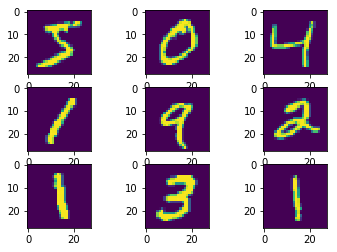

In [6]:
# Create a grid of 3x3 images
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(toimage(x_train[i]))
    
pyplot.show()

In [10]:
# Munge data
image_size = 784 # 28 x 28

x_train = x_train.reshape(x_train.shape[0], image_size) # Transform from matrix to vector
x_train = x_train.astype('float32')
x_train /= 255 # Normalize inputs from 0-255 to 0.0-1.0

x_test = x_test.reshape(x_test.shape[0], image_size) # Transform from matrix to vector
x_test = x_test.astype('float32')
x_test /= 255 # Normalize inputs from 0-255 to 0.0-1.0

print('Number of train examples:', x_train.shape[0])
print('Number of test examples:', x_test.shape[0])

Number of train examples: 60000
Number of test examples: 10000


In [11]:
# Convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

----
Define architecture
-----

In [12]:
from keras.models import Sequential
from keras.layers import Dense

In [31]:
# Define model
model = Sequential()

In [32]:
# Define input layer
layer_input = Dense(units=512, 
                    activation='sigmoid', 
                    input_shape=(image_size,))

model.add(layer_input)

In [33]:
# Define another layer
layer_input = Dense(units=512, 
                    activation='sigmoid')

model.add(layer_input)

In [34]:
# Define output layers
layer_output = Dense(units=num_classes,
                     activation='softmax')

model.add(layer_output)

In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 669,706.0
Trainable params: 669,706
Non-trainable params: 0.0
_________________________________________________________________


In [36]:
from keras.optimizers import SGD

In [37]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

----
Train model
-----

In [38]:
batch_size = 128
epochs = 5 # 20 is good number; But let's limit it to 5

In [ ]:
history = model.fit(x_train, 
                    y_train,
                    batch_size=batch_size, 
                    epochs=epochs,
                    verbose=True, 
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 11s - loss: 2.2700 - acc: 0.1972 - val_loss: 2.2273 - val_acc: 0.2731

In [ ]:
score = model.evaluate(x_test, 
                       y_test, 
                       verbose=True)

In [ ]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])